
-dataset link: https://www.kaggle.com/joniarroba/noshowappointments


In [0]:
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# matplotlib imports
import matplotlib
import matplotlib.pyplot as plt
# To plot pretty figures
#plt.rc('figure', figsize=(10, 6))
#plt.subplots(figsize=(10,6))
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

# seaborn imports
import seaborn as sns
sns.set(color_codes=True)

# bokeh imports
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure

In [0]:
import pandas as pd
import seaborn as sbs
import numpy as np
import matplotlib as plt


In [0]:
# read data-frame
df=pd.read_csv('/gdrive/My Drive/Data-Quality-Proj/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [0]:
# type of dataframe#
df.dtypes


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [0]:
#droping patien ID
df.drop(columns='PatientId',inplace=True)
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [0]:
# set the 'appointment id' column as an index
df.set_index('AppointmentID',inplace=True)

In [0]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,
5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [0]:
# converting ScheduledDay and AppointmentDay to datetime format
from datetime import datetime
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'],
                              format='%Y-%m-%d')
df['AppointmentDay'] =  pd.to_datetime(df['AppointmentDay'],
                               format='%Y-%m-%d')

In [0]:
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [0]:
# calculating Gap time and only extractng the day, and removing time stamp
df['Gap_Time'] =(df['AppointmentDay']-df['ScheduledDay']).dt.days

In [0]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gap_Time
AppointmentID,,,,,,,,,,,,,
5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [0]:
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
Gap_Time                        int64
dtype: object

In [0]:
df.Age.min()

-1

In [0]:
df.Age.max()

115

In [0]:
#defining labels for different  age, and adding new column 'Age_cat"
bins = [-2, 2, 10, 17, 30, 50, 116]
labels=["Infant","Child","Teenager","Young adults", "Adult","Elder"]
age_cat = pd.cut(df.Age,bins,labels=labels)
df['Age_cat'] = age_cat

In [0]:
df.Gap_Time.min()

-7

In [0]:
df.Gap_Time.max()

178

In [0]:
# defining labels for different cattegories in gap_time, and adding new column="wait_period"
bins = [-8,10,30,60,90,110,140,179]
labels = ["Immediate", "3Week", "2month", 
          "3month", "4month", "Half year", "More than 6 month"]
df['wait_period'] = pd.cut(df.Gap_Time, bins, labels=labels)

In [0]:
df.head()
df.shape

(110527, 15)

In [0]:
# extracting day of appoinment
df['day_of_Appointment'] = df['AppointmentDay'].dt.day_name()

In [0]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gap_Time,Age_cat,wait_period,day_of_Appointment
AppointmentID,,,,,,,,,,,,,,,,
5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1,Elder,Immediate,Friday
5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1,Elder,Immediate,Friday
5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1,Elder,Immediate,Friday
5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1,Child,Immediate,Friday
5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1,Elder,Immediate,Friday


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 5642903 to 5629448
Data columns (total 16 columns):
Gender                110527 non-null object
ScheduledDay          110527 non-null datetime64[ns, UTC]
AppointmentDay        110527 non-null datetime64[ns, UTC]
Age                   110527 non-null int64
Neighbourhood         110527 non-null object
Scholarship           110527 non-null int64
Hipertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handcap               110527 non-null int64
SMS_received          110527 non-null int64
No-show               110527 non-null object
Gap_Time              110527 non-null int64
Age_cat               110527 non-null category
wait_period           110527 non-null category
day_of_Appointment    110527 non-null object
dtypes: category(2), datetime64[ns, UTC](2), int64(8), object(4)
memory usage: 12.9+ MB


In [0]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gap_Time
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


In [0]:
#finindg corrolation between variables
df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gap_Time
Age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.034820
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.030421
Hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.017215
Diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.027188
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.038519
Handcap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.019843
SMS_received,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.398145
Gap_Time,0.034820,-0.030421,-0.017215,-0.027188,-0.038519,-0.019843,0.398145,1.000000


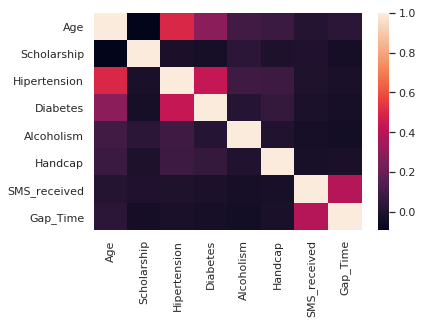

In [0]:
# creating corrolation heatmap between variables:
corr = df.corr()
sbs.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

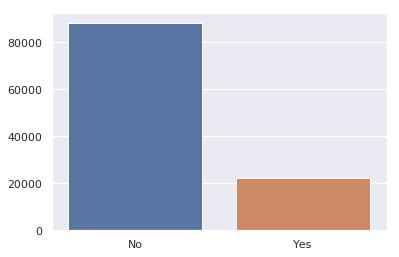

In [0]:
#visualizing the numbers of shows vs no shows people
groups = df.groupby(['No-show'])
gps = groups.size()
ax = sbs.barplot(x=gps.index.tolist(), y=gps.values)

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

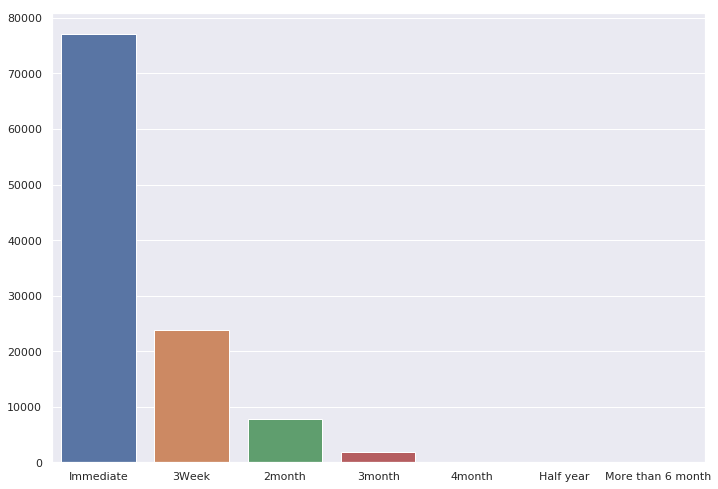

In [0]:
# visualizing the distribution of 'Waite_period'
groups = df.groupby(['wait_period'])
gps = groups.size()
sns.barplot(x=gps.index.tolist(), y=gps.values)

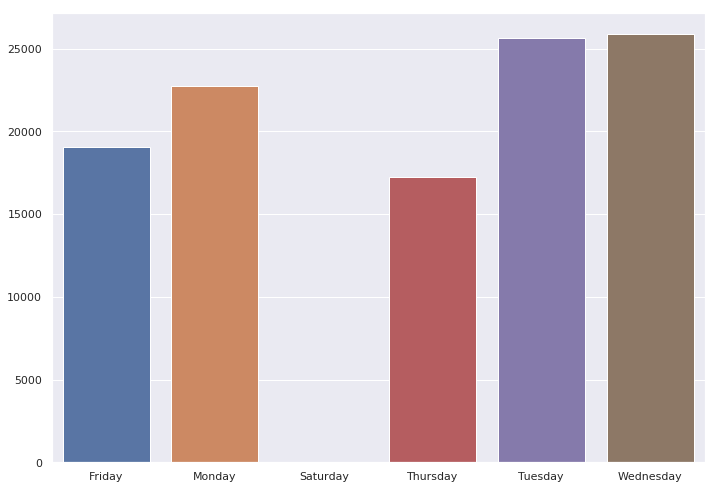

In [0]:
# visualizing the distribution of day_of_Appointment
groups = df.groupby(['day_of_Appointment'])
gps = groups.size()
sbs.barplot(x=gps.index.tolist(), y=gps.values)



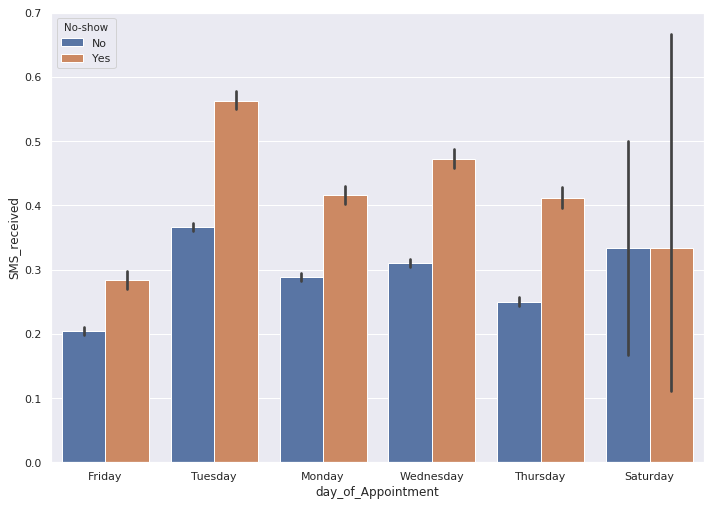

In [0]:
# visualizing people who recive text message and show-up for their appoinment based on 'day_of_Appointmen'
sbs.barplot(x='day_of_Appointment',y='SMS_received',hue='No-show',data=df)

In [0]:
# save the final dataset to new csv file
df.to_csv(r'/gdrive/My Drive/Data-Quality-Proj/sana_data.csv',index=None,header=True)

In [0]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'Gap_Time', 'Age_cat', 'wait_period',
       'day_of_Appointment'],
      dtype='object')

In [0]:
import matplotlib.pyplot as plt

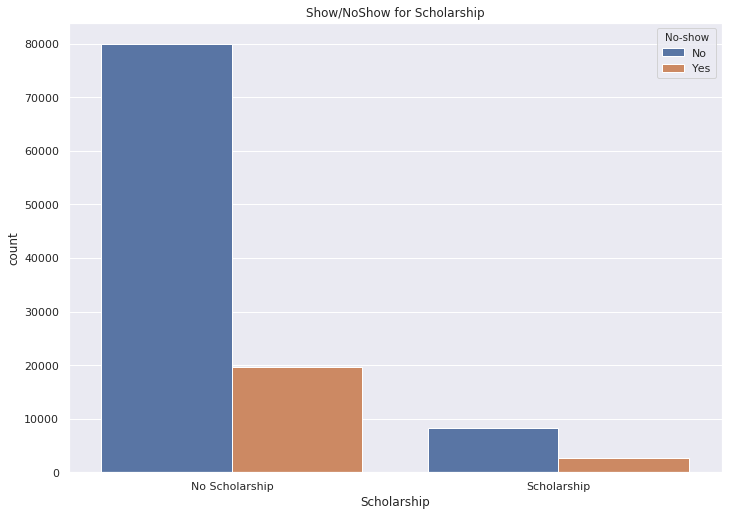

In [0]:
# visualizing Show/NoShow for pation who usnig Scholarship
ax = sns.countplot(x=df['Scholarship'], hue=df['No-show'], data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

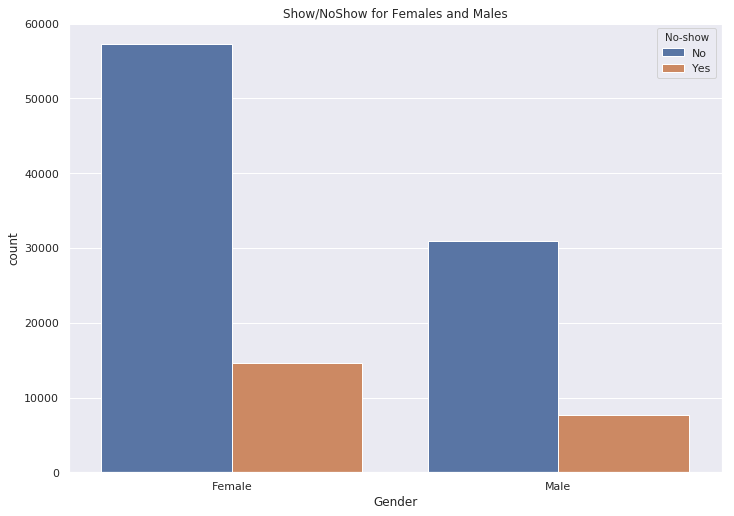

In [0]:
# visualizing Show/NoShow based on gender
ax = sns.countplot(x=df.Gender, hue=df['No-show'], data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)

[Text(0, 0, 'No Diabetes'), Text(0, 0, 'Diabetes')]

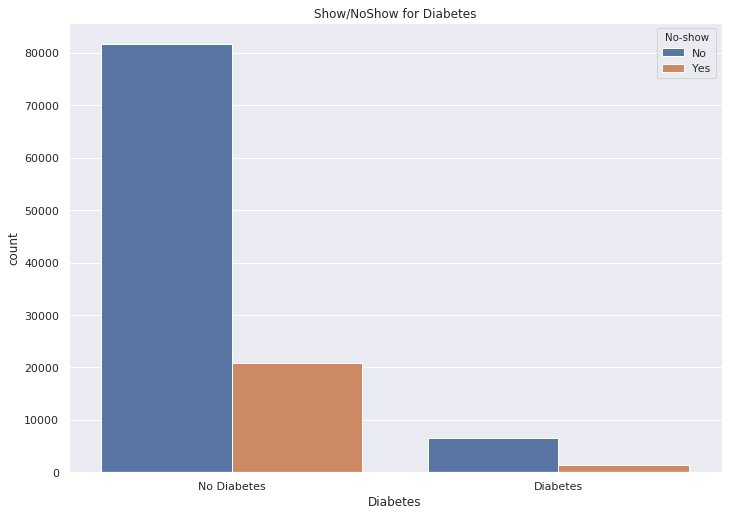

In [0]:
# visualizing Show/NoShow for pationt who has diabates
ax = sns.countplot(x=df.Diabetes, hue=df['No-show'], data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)

[Text(0, 0, 'No Alcoholism'), Text(0, 0, 'Alcoholism')]

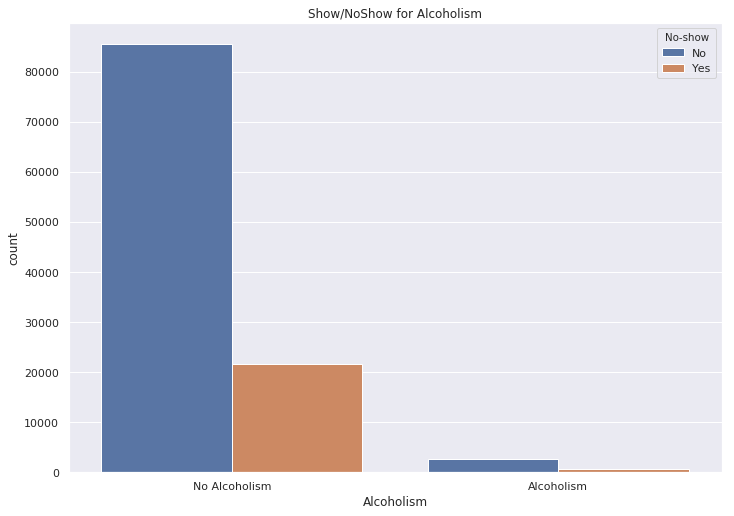

In [0]:
# visualizing Show/NoShow for pationt who are alcoholics
ax = sns.countplot(x=df.Alcoholism, hue=df['No-show'], data=df)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)



In [0]:
Day_of_week=['Monday','Tuesday','Wednesday','Thursday','Friday']

In [0]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'Gap_Time', 'Age_cat', 'wait_period',
       'day_of_Appointment'],
      dtype='object')

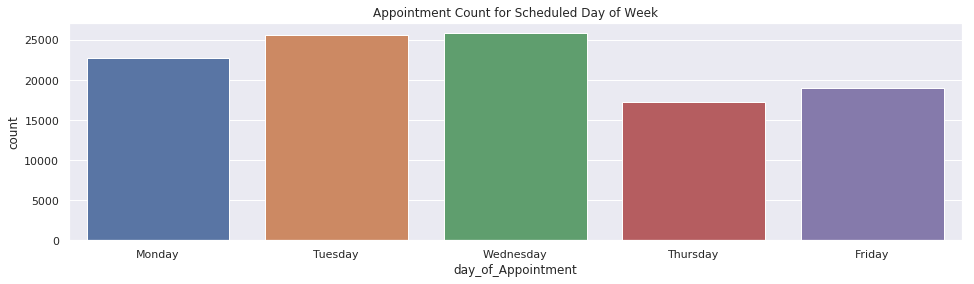

In [0]:
# showing number of appointment in each day of a week
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.day_of_Appointment,order= Day_of_week)
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show()

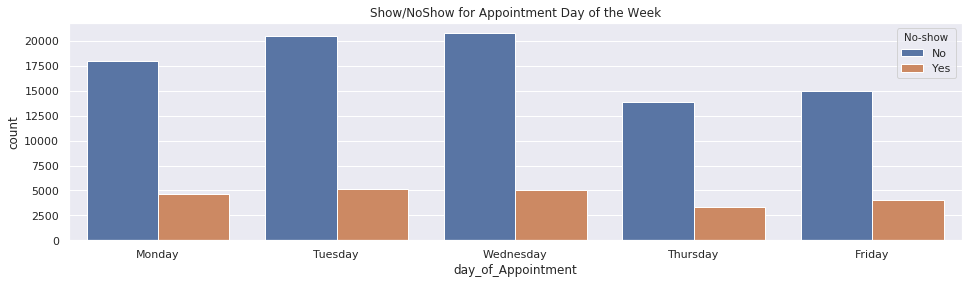

In [0]:
# Showing in each day of a week we have how many show or no show
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.day_of_Appointment, hue=df['No-show'], order=Day_of_week)
ax.set_title("Show/NoShow for Appointment Day of the Week")
plt.show()

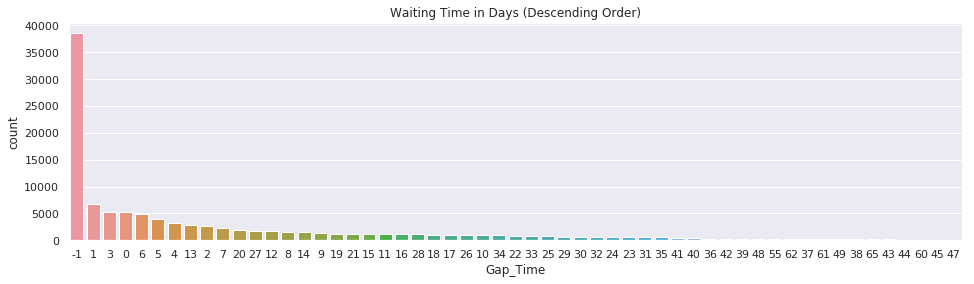

In [0]:
#showing distribution of Gap_time
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Gap_Time, order=df.Gap_Time.value_counts().iloc[:55].index)
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()

In [0]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'Gap_Time', 'Age_cat', 'wait_period',
       'day_of_Appointment'],
      dtype='object')

## PCA

In [0]:
#selecting only numerical columns to perform PCA
df_pca=df[['Age','Gap_Time']]

In [0]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_pca)
new_scaled=scaler.transform(df_pca)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [0]:

df_new_scaled = pd.DataFrame(new_scaled, columns = df_pca.columns.to_list())
df_new_scaled.head()

,Age,Gap_Time
0,1.077932,-0.667568
1,0.818306,-0.667568
2,1.077932,-0.667568
3,-1.258708,-0.667568
4,0.818306,-0.667568


In [0]:
#now applying PCA method:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df_new_scaled.values) 

arr_new_pca = pca.transform(df_new_scaled.values) 

#let's check the shape of df_new_pca array
print("shape of arr_new_pca", arr_new_pca.shape)

shape of arr_new_pca (110527, 2)


In [0]:
elements=["Z1", "Z2"]
len(elements)

2

In [0]:
pca_df = pd.DataFrame(pca.components_, columns = elements,index=df_pca.columns.to_list())
pca_df

,Z1,Z2
Age,0.707107,0.707107
Gap_Time,-0.707107,0.707107


In [0]:
pca_exp_var = pd.DataFrame(pca.explained_variance_, index = elements, columns = ["variance"])



In [0]:
pca_percent_exp_var = pd.DataFrame(pca.explained_variance_ratio_ * 100, index = elements, columns = ["% variance"])

In [0]:
pca_exp_var.merge(pca_percent_exp_var, left_index = True, right_index = True)

,variance,% variance
Z1,1.034830,51.741019
Z2,0.965188,48.258981


In [0]:
# you can see Z1 accounts for 51% of total variability, and Z2 for 48%

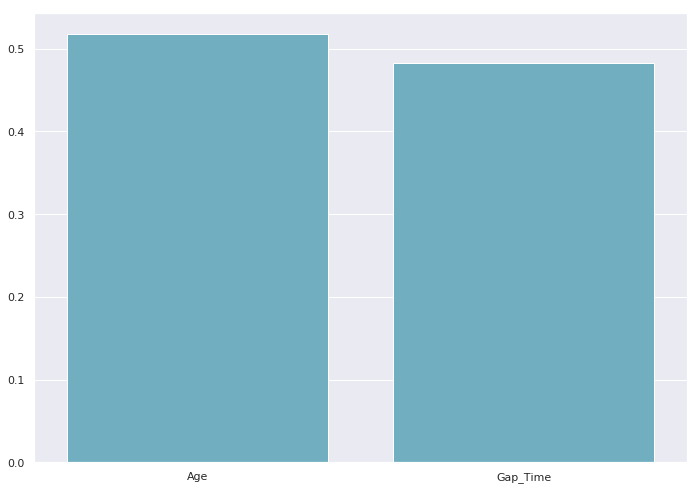

In [0]:
sns.barplot(x=['Age','Gap_Time'],y=pca.explained_variance_ratio_, 
           data=pca_df, color="c")